# Obesity

Data: https://archive-beta.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

Variable names: https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub#sec1

They are in the same order as in the article

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
varnames = [
    'gender', 'age', 'height', 'weight', 'family_history_with_overweight',
    'eat_high_cal_food',
    'freq_eat_veggies',
    'daily_main_meals',
    'eat_between_meals',
    'smoke',
    'water_intake',
    'moitor_daily_calories',
    'freq_physical_activity',
    'use_of_tech_devices',
    'alcohol_intake',
    'transportation_mean',
    'obesity_type']

In [3]:
data = pd.read_csv("obesity.csv")

data.columns = varnames

data.head()

,gender,age,height,weight,family_history_with_overweight,eat_high_cal_food,freq_eat_veggies,daily_main_meals,eat_between_meals,smoke,water_intake,moitor_daily_calories,freq_physical_activity,use_of_tech_devices,alcohol_intake,transportation_mean,obesity_type
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
data.shape

(2111, 17)

In [5]:
# add missing values at random

varnames.remove("weight")
varnames.remove("obesity_type")

for i in range(6):
    frac = np.random.uniform(0,0.2)
    col = data[varnames].sample(1, axis=1).columns[0]
    
    nanidx = data.sample(frac=frac).index
    data.loc[nanidx, col] = np.NaN

In [6]:
# check nan

cols_nan = [c for c in data.columns if data[c].isnull().any()]

data[cols_nan].isnull().mean()

gender                            0.087636
family_history_with_overweight    0.068214
daily_main_meals                  0.058266
water_intake                      0.145902
alcohol_intake                    0.304121
dtype: float64

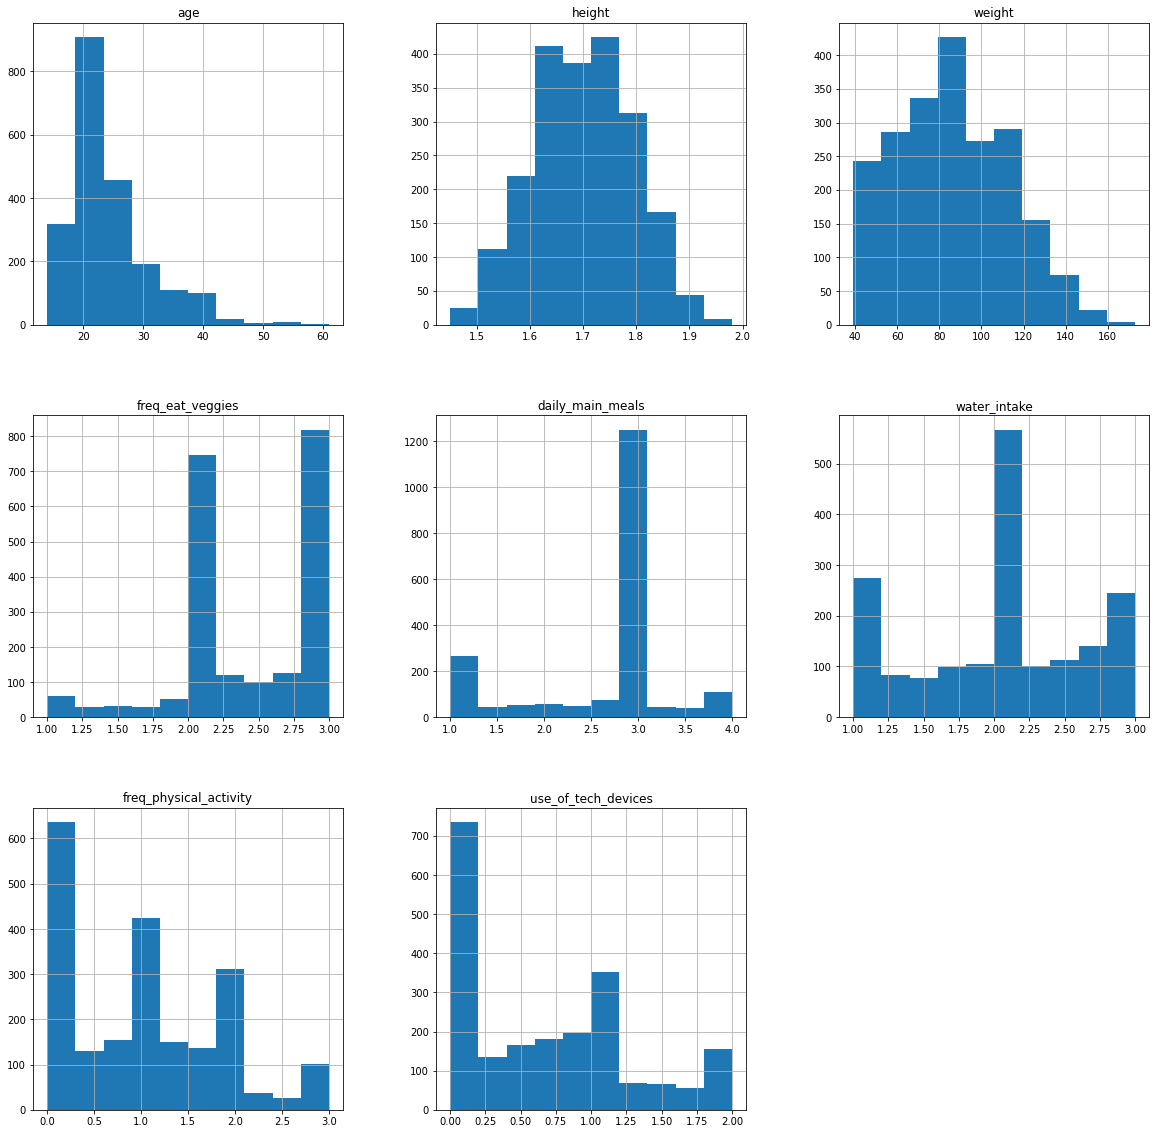

In [7]:
data.hist(figsize=(20,20))
plt.show()

In [8]:
cat_vars = [c for c in data.columns if data[c].dtype == "O"]
cat_vars

['gender',
 'family_history_with_overweight',
 'eat_high_cal_food',
 'eat_between_meals',
 'smoke',
 'moitor_daily_calories',
 'alcohol_intake',
 'transportation_mean',
 'obesity_type']

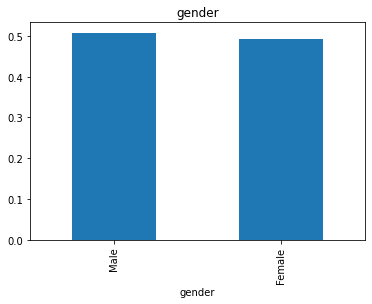

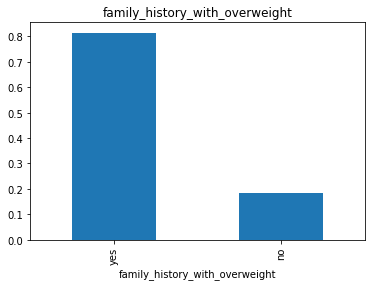

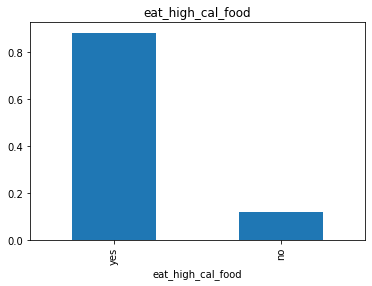

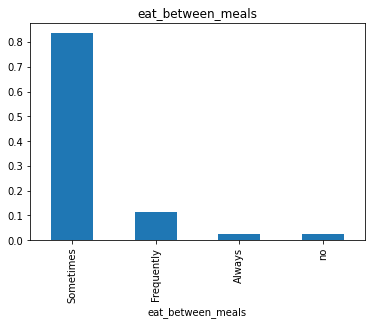

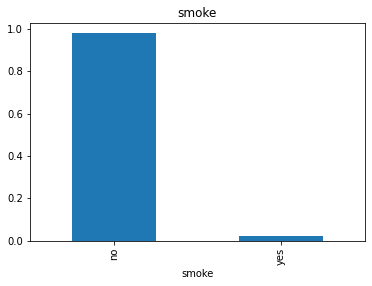

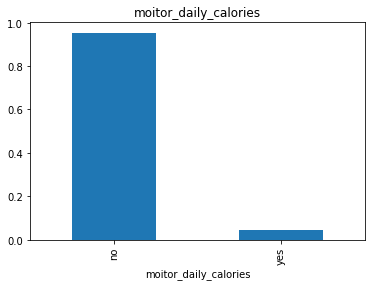

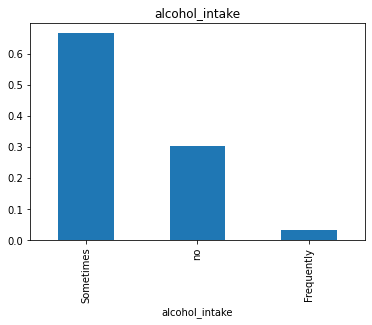

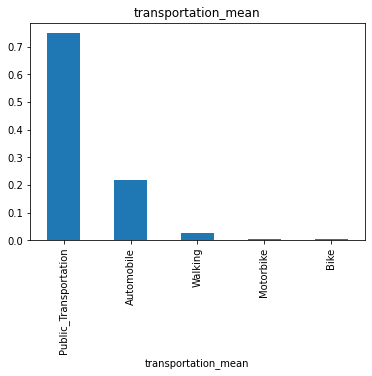

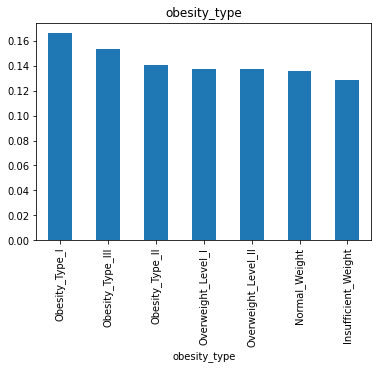

In [9]:
for var in cat_vars:
    data[var].value_counts(normalize=True).plot.bar()
    plt.title(var)
    plt.show()

In [10]:
data.to_csv("obesity_nan.csv", index=False)

In [11]:
data=pd.read_csv("obesity_nan.csv")

data.head()

,gender,age,height,weight,family_history_with_overweight,eat_high_cal_food,freq_eat_veggies,daily_main_meals,eat_between_meals,smoke,water_intake,moitor_daily_calories,freq_physical_activity,use_of_tech_devices,alcohol_intake,transportation_mean,obesity_type
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,NaN,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,NaN,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,NaN,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,NaN,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
